# Stock Market Prediction: Hybrid Model

**Author: Kruthi S B**    
**Start Date:** *18/10/2023*               
**End Date:** *in progress*

# Description

**Objective:** 
Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.

**Stock to analyze and predict:**  SENSEX (S&P BSE SENSEX) - from 2017 to 2022 (5 years)

**Data Source:**
- Text: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DPQMQH
- Stock: https://www.bseindia.com/Indices/IndexArchiveData.html

# Imports

In [73]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [74]:
news = pd.read_csv('Data/news.csv')
stock = pd.read_csv('Data/stock.csv')

# Info

In [75]:
news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [76]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 83.6+ MB


In [77]:
stock.head()

,Date,Open,High,Low,Close,Unnamed: 5
0,2-January-2017,26711.15,26720.98,26447.06,26595.45,NaN
1,3-January-2017,26616.92,26724.40,26488.37,26643.24,NaN
2,4-January-2017,26677.22,26723.37,26606.06,26633.13,NaN
3,5-January-2017,26738.42,26917.21,26738.42,26878.24,NaN
4,6-January-2017,26929.69,27009.61,26733.33,26759.23,NaN


In [78]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1239 entries, 0 to 1238
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1239 non-null   object 
 1   Open        1239 non-null   float64
 2   High        1239 non-null   float64
 3   Low         1239 non-null   float64
 4   Close       1239 non-null   float64
 5   Unnamed: 5  0 non-null      float64
dtypes: float64(5), object(1)
memory usage: 58.2+ KB


Notice the following:

- the data of stocks is taken from 2017 to 2021 (5 years)
- whereas the news data is from 2001 to 2022 (if you see the data source website)
- we'll extract the news data from 2017 to 2021 (5 years) to match the stock data.

In [79]:
# convert date to standard format
news["publish_date"] = pd.to_datetime(news["publish_date"], format = "%Y%m%d")

# select rows between specific dates
start_date = '2017-01-01'
end_date = '2022-01-01'
news = news.loc[(news["publish_date"] >= start_date) & (news["publish_date"] <= end_date)]

news.head(5)

,publish_date,headline_category,headline_text
2550452,2017-01-01,life-style.beauty,Look-ing ahead
2550453,2017-01-01,life-style.health-fitness.weight-loss,Genie in a diet
2550454,2017-01-01,life-style.health-fitness.de-stress,17 ideas for 2017
2550455,2017-01-01,life-style.health-fitness.de-stress,I started living my life to my highest potenti...
2550456,2017-01-01,life-style.home-garden,Hygge up your home


In [80]:
print("Stock: ", stock.shape)
print("News: ", news.shape)

Stock:  (1239, 6)
News:  (1056117, 3)


# Stocks

In [81]:
stock.head()

,Date,Open,High,Low,Close,Unnamed: 5
0,2-January-2017,26711.15,26720.98,26447.06,26595.45,NaN
1,3-January-2017,26616.92,26724.40,26488.37,26643.24,NaN
2,4-January-2017,26677.22,26723.37,26606.06,26633.13,NaN
3,5-January-2017,26738.42,26917.21,26738.42,26878.24,NaN
4,6-January-2017,26929.69,27009.61,26733.33,26759.23,NaN


## Data Preprocessing

In [82]:
# delete the null column
stock.drop("Unnamed: 5", axis=1, inplace=True)

In [83]:
stock.head()

,Date,Open,High,Low,Close
0,2-January-2017,26711.15,26720.98,26447.06,26595.45
1,3-January-2017,26616.92,26724.40,26488.37,26643.24
2,4-January-2017,26677.22,26723.37,26606.06,26633.13
3,5-January-2017,26738.42,26917.21,26738.42,26878.24
4,6-January-2017,26929.69,27009.61,26733.33,26759.23


In [84]:
stock.tail()

,Date,Open,High,Low,Close
1234,27-December-2021,56948.33,57512.01,56543.08,57420.24
1235,28-December-2021,57751.21,57952.48,57650.29,57897.48
1236,29-December-2021,57892.31,58097.07,57684.58,57806.49
1237,30-December-2021,57755.40,58010.03,57578.99,57794.32
1238,31-December-2021,57849.76,58409.30,57846.52,58253.82


In [85]:
# convert date to standard format
from datetime import datetime

# apply the lambda function to all items in the column
stock['Date'] = stock['Date'].apply(lambda x: datetime.strptime(x, '%d-%B-%Y'))

stock.tail()

,Date,Open,High,Low,Close
1234,2021-12-27,56948.33,57512.01,56543.08,57420.24
1235,2021-12-28,57751.21,57952.48,57650.29,57897.48
1236,2021-12-29,57892.31,58097.07,57684.58,57806.49
1237,2021-12-30,57755.40,58010.03,57578.99,57794.32
1238,2021-12-31,57849.76,58409.30,57846.52,58253.82


In [86]:
# check for null values
stock.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [87]:
# check for duplicates
stock.duplicated().sum()

0

# Exploratory Data Analysis

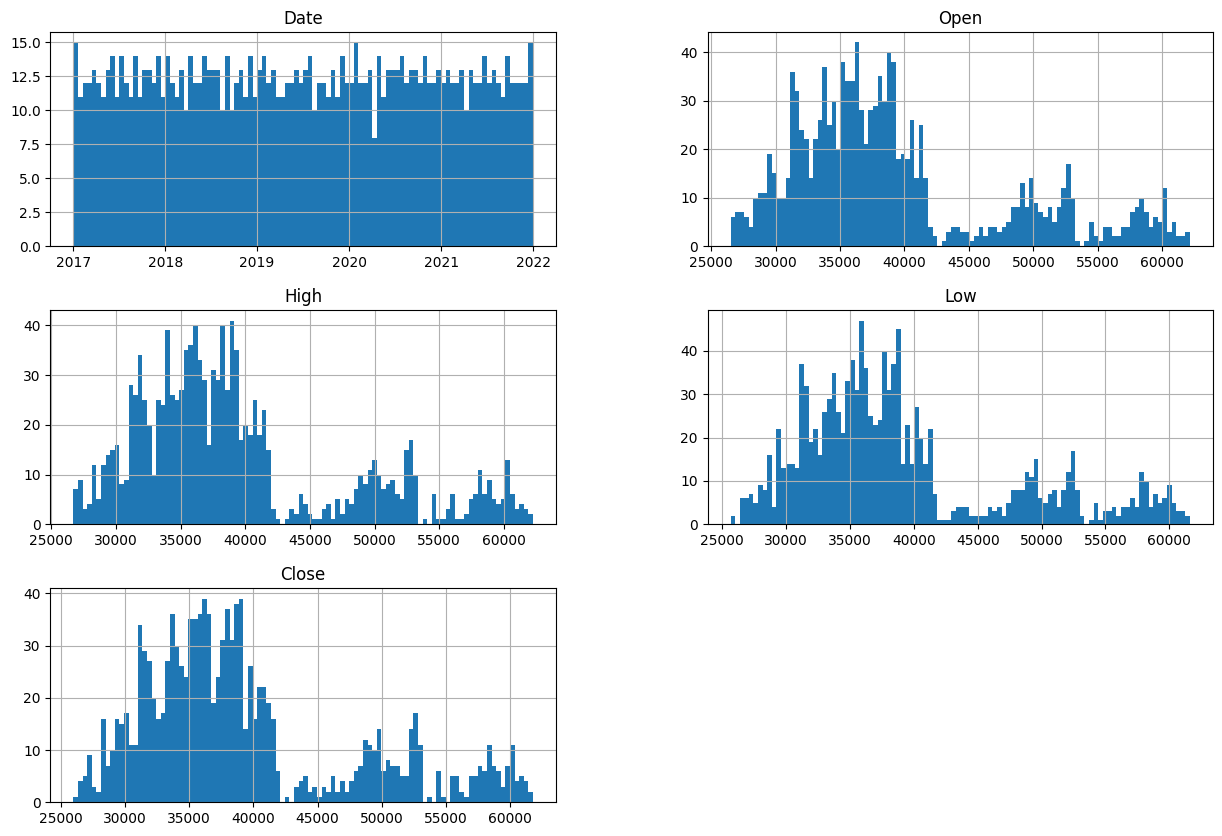

In [88]:
# histogram
stock.hist(figsize=(15,10), bins=100)
plt.show()

Open, High, Low, Close (OHLC) all have the same data distribution.

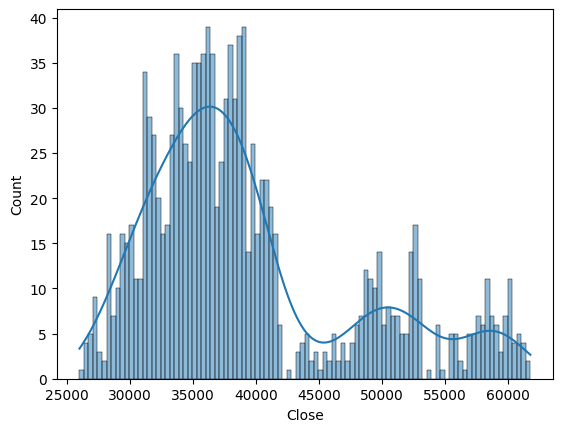

In [89]:
# histogram of close with kernel density estimation
sns.histplot(stock["Close"], kde=True, bins=100)
plt.show()

Above grpah shows the detailed histogram with KDE. We see that the prices are skewed to the right.

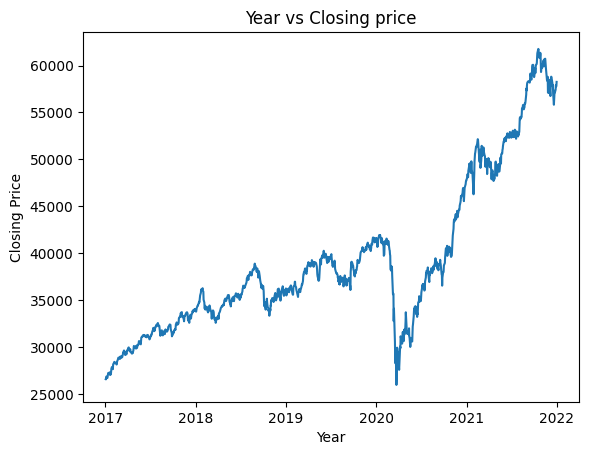

In [125]:
# line chart
plt.plot(stock["Date"], stock["Close"])
plt.ylabel("Closing Price")
plt.xlabel("Year")
plt.title("Year vs Closing price")
plt.show()

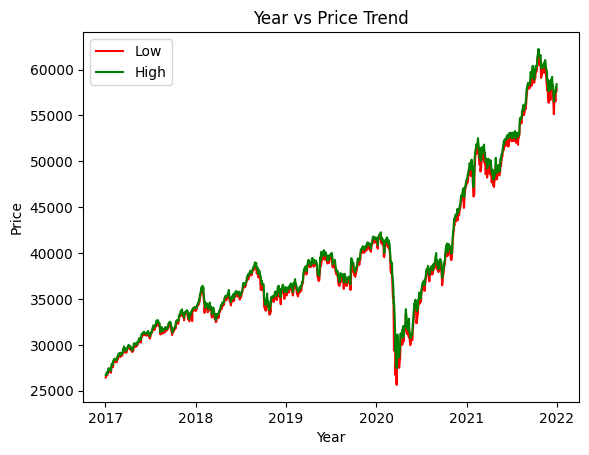

In [126]:
# line chart
plt.plot(stock["Date"], stock["Low"], c="red")
plt.plot(stock["Date"], stock["High"], c="g")
plt.ylabel("Price")
plt.xlabel("Year")
plt.legend(["Low","High"])
plt.title("Year vs Price Trend")
plt.show()

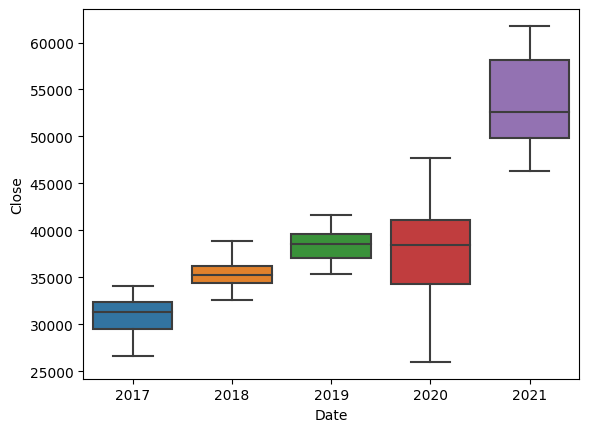

In [127]:
# data distribution
sns.boxplot(x=stock["Date"].dt.year, y=stock["Close"])
plt.show()

In [129]:
# candle stick plot
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=stock["Date"],
                open=stock['Open'],
                high=stock['High'],
                low=stock['Low'],
                close=stock['Close'])])

fig.show()